# Preparing Wide Form Time Data
#### Kevin Ridge

In [1]:
# Common Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set random seed
SEED = 321
np.random.seed(SEED)

## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)



In [2]:
# Load the data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe

In [3]:
df = df[df['SizeRank']<=3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


In [4]:
# Display Columns to melt
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

## Melt the data to long-form and prepare it for time series analysis

In [5]:
# Melt the data
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 
                             'RegionType', 'StateName','State', 'Metro', 
                             'CountyName'])
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
# Change name of column 'varibale' to 'Date' and 'RegionName' to 'City'
melted.rename(columns = {'variable':'Date', 'RegionName':'City',
                         'value':'HomeValue'}, inplace = True)

In [7]:
# Convert the melted dates into datetime datatype
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   City        1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [8]:
# Make the datetime column the index
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


## Resample the dataframe as monthly frequency, grouped by City

In [9]:
df_ts = melted.groupby('City').resample("M").sum()
df_ts

C:\Users\ridge\AppData\Local\Temp\ipykernel_5496\1192720050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('City').resample("M").sum()
C:\Users\ridge\AppData\Local\Temp\ipykernel_5496\1192720050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('City').resample("M").sum()
C:\Users\ridge\AppData\Local\Temp\ipykernel_5496\1192720050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for th

RegionID  SizeRank  HomeValue
City     Date                                     
Chicago  2000-01-31     17426         3   166139.0
         2000-02-29     17426         3   166536.0
         2000-03-31     17426         3   167368.0
         2000-04-30     17426         3   168826.0
         2000-05-31     17426         3   170499.0
...                       ...       ...        ...
New York 2022-05-31      6181         0   768797.0
         2022-06-30      6181         0   773944.0
         2022-07-31      6181         0   777692.0
         2022-08-31      6181         0   779960.0
         2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

# Plot the home values for all 4 cities.

In [14]:
# Create dataframe to plot
plot_df = df_ts.drop(columns = ['RegionID', 'SizeRank'])

In [15]:
# Apply unstack() for Visualization
unstacked = plot_df.unstack(level=0)
unstacked

HomeValue                                
City         Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

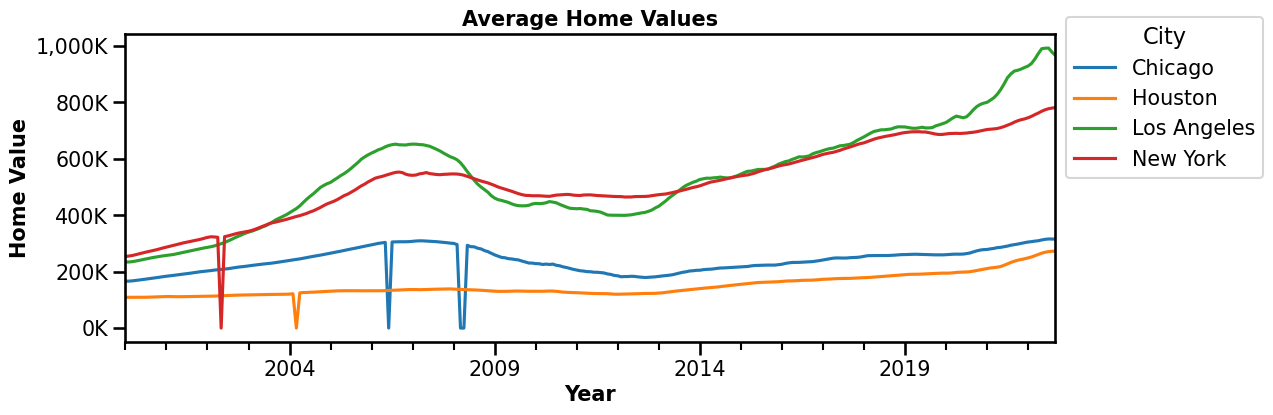

In [33]:
 #function for use wth matplotlib FuncFormatter-formats money in thousands
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create plot ### If I don't add 'HomeValue' here it appears in legend
ax = unstacked['HomeValue'].plot() 
# Set labels
ax.set_title('Average Home Values', fontsize=15, fontweight='bold')
ax.set_ylabel('Home Value', fontsize=15, fontweight='bold')
ax.set_xlabel('Year', fontsize=15, fontweight='bold')
ax.legend(title='City', loc='lower left', bbox_to_anchor=(1.0, 0.5))
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

# Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [37]:
hvc = df_ts.loc[pd.IndexSlice[:, '2008'],:]
hvc

RegionID  SizeRank  HomeValue
City        Date                                     
Chicago     2008-01-31     17426         3   300207.0
            2008-02-29     17426         3   296063.0
            2008-03-31     17426         3        0.0
            2008-04-30     17426         3        0.0
            2008-05-31     17426         3   293467.0
            2008-06-30     17426         3   288495.0
            2008-07-31     17426         3   288174.0
            2008-08-31     17426         3   283199.0
            2008-09-30     17426         3   280695.0
            2008-10-31     17426         3   274849.0
            2008-11-30     17426         3   271059.0
            2008-12-31     17426         3   265306.0
Houston     2008-01-31     39051         2   138208.0
            2008-02-29     39051         2   137512.0
            2008-03-31     39051         2   136795.0
            2008-04-30     39051         2   136628.0
            2008-05-31     39051         2   136228.0
            2008-06-30     39051         2   135773.0
            2008-07-31     39051         2   135392.0
            2008-08-31     39051         2   134770.0
            2008-09-30     39051         2   133932.0
            2008-10-31     39051         2   133189.0
            2008-11-30     39051         2   132247.0
            2008-12-31     39051         2   131283.0
Los Angeles 2008-01-31     12447         1   603029.0
            2008-02-29     12447         1   596635.0
            2008-03-31     12447         1   586065.0
            2008-04-30     12447         1   571226.0
            2008-05-31     12447         1   554589.0
            2008-06-30     12447         1   539622.0
            2008-07-31     12447         1   524220.0
            2008-08-31     12447         1   510520.0
            2008-09-30     12447         1   500124.0
            2008-10-31     12447         1   490979.0
            2008-11-30     12447         1   481905.0
            2008-12-31     12447         1   469294.0
New York    2008-01-31      6181         0   546538.0
            2008-02-29      6181         0   546098.0
            2008-03-31      6181         0   544562.0
            2008-04-30      6181         0   541865.0
            2008-05-31      6181         0   537685.0
            2008-06-30      6181         0   533810.0
            2008-07-31      6181         0   529211.0
            2008-08-31      6181         0   525290.0
            2008-09-30      6181         0   521347.0
            2008-10-31      6181         0   518048.0
            2008-11-30      6181         0   514767.0
            2008-12-31      6181         0   510309.0

## According to this data, New York had the highest typical home value on 12/31/2008 and Houston had the lowest of the 4 cities at the end of the year.

# How much did the home values change from November 2008 to December 2008 (in dollars)?

In [49]:
# Create varibale for the time range
sliced = hvc.loc[pd.IndexSlice[:, '2008-11-30':'2008-12-31'],:]

In [61]:
# Display the difference with both months for each city
sd = sliced.diff()
sd

RegionID  SizeRank  HomeValue
City        Date                                     
Chicago     2008-11-30       NaN       NaN        NaN
            2008-12-31       0.0       0.0    -5753.0
Houston     2008-11-30   21625.0      -1.0  -133059.0
            2008-12-31       0.0       0.0     -964.0
Los Angeles 2008-11-30  -26604.0      -1.0   350622.0
            2008-12-31       0.0       0.0   -12611.0
New York    2008-11-30   -6266.0      -1.0    45473.0
            2008-12-31       0.0       0.0    -4458.0

In [65]:
# Display the difference for individual city
slicedsum = sd.loc[pd.IndexSlice[:,'2008-12-31'],:]
slicedsum

,,RegionID,SizeRank,HomeValue
City,Date,,,
Chicago,2008-12-31,0.0,0.0,-5753.0
Houston,2008-12-31,0.0,0.0,-964.0
Los Angeles,2008-12-31,0.0,0.0,-12611.0
New York,2008-12-31,0.0,0.0,-4458.0


In [71]:
# Add the differences together
num = slicedsum.sum()
num

RegionID         0.0
SizeRank         0.0
HomeValue   -23786.0
dtype: float64

In [67]:
# Average difference between the four cities
num/4

RegionID        0.0
SizeRank        0.0
HomeValue   -5946.5
dtype: float64

## The total change in home value for these four cities from November 2008 to December 2008 is $-23,786.